<br><br>

## Image Processing

### Introduction

<img class="imgright" width="50%" src="images/charlie_cubism.png" alt="Charlie Chaplin, changed with Python, Numpy and Matplotlib" />

It has never been easier to take a picture than it is today. All you normally need is a cell phone. These are the essentials to take and view a picture. Taking photos is free if we don't include the cost of the mobile phone, which is often bought for other purposes anyway.  A generation ago, amateur and real artists needed specialized and often expensive equipment, and the cost per image was far from free.

We take photos to preserve great moments of our life in time. "Pickled memories" ready to be "opened" in the future at will. 

Similar to pickling, we need to use the right preservatives. Of course, the mobile phone also offers us a range of image processing software, but as soon as we have to process a large amount of photos, we need other tools. This is when programming and Python come into play. Python and its modules such as Numpy, Scipy, Matplotlib and other special modules offer the optimal functionality to cope with the flood of images.

In order to provide you with the necessary knowledge, this chapter of our Python tutorial deals with basic image processing and manipulation. For this purpose we use the modules NumPy, Matplotlib and SciPy.

We start with the ```scipy``` package ```misc```. The helpfile says that scipy.misc contains "various utilities that don't have another home". For example, it also contains a few images, such as the following:

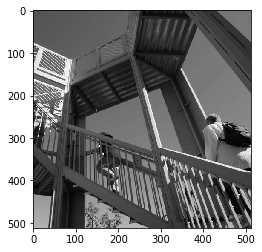

In [1]:
from scipy import misc
import matplotlib.pyplot as plt

ascent = misc.ascent()
plt.gray()
plt.imshow(ascent)
plt.show()

Additionally to the image, we can see the axis with the ticks. This may be very interesting, if you need some orientations about the size and the pixel position, but in most cases, you want to see the image without this information. We can get rid of the ticks and the axis by adding the command <code>plt.axis("off")</code>:

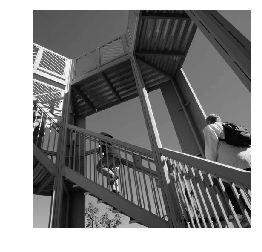

In [2]:
from scipy import misc

ascent = misc.ascent()
import matplotlib.pyplot as plt
plt.axis("off") # removes the axis and the ticks
plt.gray()
plt.imshow(ascent)
plt.show()

We can see that the type of this image is an integer array:

In [3]:
ascent.dtype

dtype('int64')

We can also check the size of the image:

In [4]:
ascent.shape

(512, 512)

The misc package contains an image of a racoon as well:

(768, 1024, 3)
<built-in method max of numpy.ndarray object at 0x7fa59c3e4710>
uint8


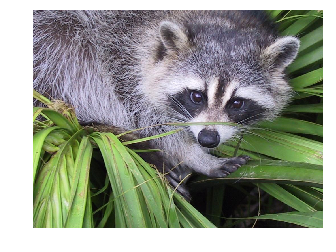

In [5]:
import scipy.misc
face = scipy.misc.face()
print(face.shape)
print(face.max)
print(face.dtype)
plt.axis("off")
plt.gray()
plt.imshow(face)
plt.show()


In [6]:
import matplotlib.pyplot as plt

Only png images are supported by matplotlib

In [7]:
img = plt.imread('frankfurt.png')

In [8]:
print(img[:3])

[[[0.4117647  0.5686275  0.8       ]
  [0.40392157 0.56078434 0.7921569 ]
  [0.40392157 0.5686275  0.79607844]
  ...
  [0.48235294 0.62352943 0.81960785]
  [0.47843137 0.627451   0.81960785]
  [0.47843137 0.62352943 0.827451  ]]

 [[0.40784314 0.5647059  0.79607844]
  [0.40392157 0.56078434 0.7921569 ]
  [0.40392157 0.5686275  0.79607844]
  ...
  [0.48235294 0.62352943 0.81960785]
  [0.47843137 0.627451   0.81960785]
  [0.48235294 0.627451   0.83137256]]

 [[0.40392157 0.5686275  0.79607844]
  [0.40392157 0.5686275  0.79607844]
  [0.40392157 0.5686275  0.79607844]
  ...
  [0.48235294 0.62352943 0.81960785]
  [0.48235294 0.62352943 0.81960785]
  [0.4862745  0.627451   0.83137256]]]


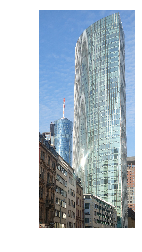

In [9]:
plt.axis("off")
imgplot = plt.imshow(img)

In [10]:
lum_img = img[:,:,1]
print(lum_img)

[[0.5686275  0.56078434 0.5686275  ... 0.62352943 0.627451   0.62352943]
 [0.5647059  0.56078434 0.5686275  ... 0.62352943 0.627451   0.627451  ]
 [0.5686275  0.5686275  0.5686275  ... 0.62352943 0.62352943 0.627451  ]
 ...
 [0.31764707 0.32941177 0.32941177 ... 0.30588236 0.3137255  0.31764707]
 [0.31764707 0.3137255  0.32941177 ... 0.3019608  0.32156864 0.3372549 ]
 [0.31764707 0.3019608  0.33333334 ... 0.30588236 0.32156864 0.33333334]]


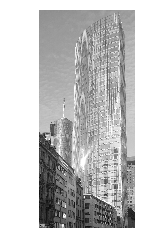

In [11]:
plt.axis("off")
imgplot = plt.imshow(lum_img)

<br><br>

### Tint, Shade and Tone

Now, we will show how to tint an image. Tint is an expression from colour theory and an often used technique by painters. Thinking about painters and not think about the Netherlands is hard to imagine. So we will use a picture with Dutch windmills in our next example. (The image has been taken at Kinderdijk, a village in the Netherlands, about 15 km east of Rotterdam and about 50 kilometres from Den Haag (The Hague). It's a UNESCO World Heritage Site since 1997.)


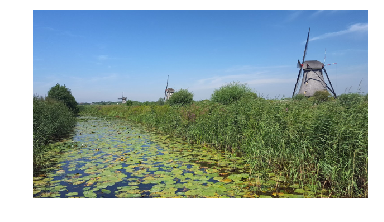

In [12]:
windmills = plt.imread('windmills.png')

plt.axis("off")
plt.imshow(windmills)

We want to tint the image now. This means we will "mix" our colours with white. This will increase the  lightness of our image. For this purpose, we write a [Python function](python3_functions.php), which takes an image and a percentage value as a parameter. Setting 'percentage' to 0 will not change the image, setting it to one means that the image will be completely whitened:

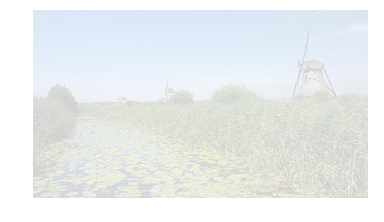

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def tint(imag, percent):
    """
    imag: the image which will be shaded
    percent: a value between 0 (image will remain unchanged
             and 1 (image will completely white)
    """
    tinted_imag = imag + (np.ones(imag.shape) - imag) * percent
    return tinted_imag

windmills = plt.imread('windmills.png')

tinted_windmills = tint(windmills, 0.8)
plt.axis("off")
plt.imshow(tinted_windmills)

A shade is the mixture of a color with black, which reduces lightness.

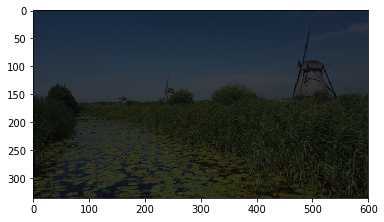

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def shade(imag, percent):
    """
    imag: the image which will be shaded
    percent: a value between 0 (image will remain unchanged
             and 1 (image will be blackened)
    """
    tinted_imag = imag * (1 - percent)
    return tinted_imag

windmills = plt.imread('windmills.png')

tinted_windmills = shade(windmills, 0.7)
plt.imshow(tinted_windmills)


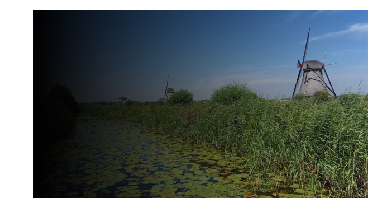

In [15]:
def vertical_gradient_line(image, reverse=False):
    """
    We create a horizontal gradient line with the shape (1, image.shape[1], 3))
    The values are incremented from 0 to 1, if reverse is False,
    otherwise the values are decremented from 1 to 0.
    """
    number_of_columns = image.shape[1]
    if reverse:
        C = np.linspace(1, 0, number_of_columns)
    else:
        C = np.linspace(0, 1, number_of_columns)
    C = np.dstack((C, C, C))
    return C

horizontal_brush = vertical_gradient_line(windmills)
tinted_windmills =  windmills * horizontal_brush
plt.axis("off")
plt.imshow(tinted_windmills)


We will tint the image now from right to left by setting the reverse parameter of our Python function to "True":

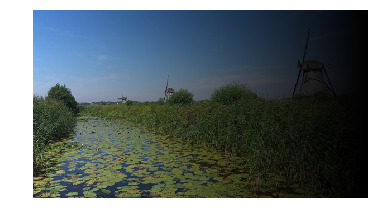

In [16]:
def vertical_gradient_line(image, reverse=False):
    """
    We create a horizontal gradient line with the shape (1, image.shape[1], 3))
    The values are incremented from 0 to 1, if reverse is False,
    otherwise the values are decremented from 1 to 0.
    """
    number_of_columns = image.shape[1]
    if reverse:
        C = np.linspace(1, 0, number_of_columns)
    else:
        C = np.linspace(0, 1, number_of_columns)
    C = np.dstack((C, C, C))
    return C

horizontal_brush = vertical_gradient_line(windmills, reverse=True)
tinted_windmills =  windmills * horizontal_brush
plt.axis("off")
plt.imshow(tinted_windmills)


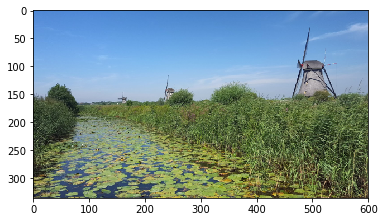

In [17]:
def horizontal_gradient_line(image, reverse=False):
    """
    We create a vertical gradient line with the shape (image.shape[0], 1, 3))
    The values are incremented from 0 to 1, if reverse is False,
    otherwise the values are decremented from 1 to 0.
    """
    number_of_rows, number_of_columns = image.shape[:2]
    C = np.linspace(1, 0, number_of_rows)
    C = C[np.newaxis,:]
    C = np.concatenate((C, C, C)).transpose()
    C = C[:, np.newaxis]
    return C

vertical_brush = horizontal_gradient_line(windmills)
tinted_windmills =  windmills 
plt.imshow(tinted_windmills)

 A tone is produced either by the mixture of a color with gray, or by both tinting and shading.

[[0.16470589 0.16862746 0.1764706  ... 0.         0.         0.        ]
 [0.16078432 0.16078432 0.16470589 ... 0.         0.         0.        ]
 [0.15686275 0.15686275 0.16078432 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


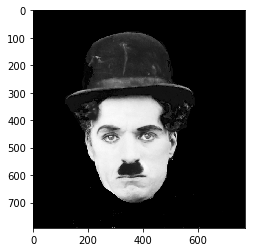

In [18]:
charlie = plt.imread('Chaplin.png')
plt.gray()
print(charlie)
plt.imshow(charlie)

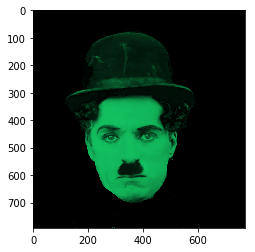

In [19]:
colored = np.dstack((charlie*0.1, charlie*1, charlie*0.5))

plt.imshow(colored)


We will use different colormaps in the following example. The colormaps can be found in 
matplotlib.pyplot.cm.datad:

In [20]:
plt.cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral

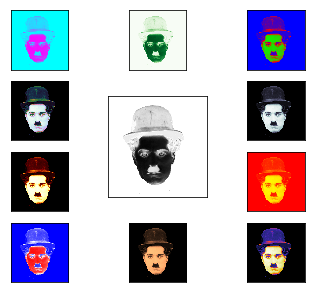

In [22]:
import numpy as np
import matplotlib.pyplot as plt

charlie = plt.imread('Chaplin.png')

#  colormaps plt.cm.datad
# cmaps = set(plt.cm.datad.keys())
cmaps = {'afmhot', 'autumn', 'bone', 'binary', 'bwr', 'brg', 
         'CMRmap', 'cool', 'copper', 'cubehelix', 'Greens'}

X = [(4, 3, 1, (1, 0, 0)), 
     (4, 3, 2, (0.5, 0.5, 0)), 
     (4, 3, 3, (0, 1, 0)), 
     (4, 3, 4, (0, 0.5, 0.5)),  
     (4, 3, (5, 8), (0, 0, 1)), 
     (4, 3, 6, (1, 1, 0)), 
     (4, 3, 7, (0.5, 1, 0) ),
     (4, 3, 9, (0, 0.5, 0.5)),
     (4, 3, 10, (0, 0.5, 1)), 
     (4, 3, 11, (0, 1, 1)),
     (4, 3, 12, (0.5, 1, 1))]

fig = plt.figure(figsize=(6, 5))

#fig.subplots_adjust(bottom=0, left=0, top = 0.975, right=1)
for nrows, ncols, plot_number, factor in X:
    sub = fig.add_subplot(nrows, ncols, plot_number)
    sub.set_xticks([])
    
    sub.imshow(charlie*0.0002, cmap=cmaps.pop())
    sub.set_yticks([])